In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
data = pd.read_csv('Holiday_Package.csv')
data.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [4]:
data.tail()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
867,868,no,40030,24,4,2,1,yes
868,869,yes,32137,48,8,0,0,yes
869,870,no,25178,24,6,2,0,yes
870,871,yes,55958,41,10,0,1,yes
871,872,no,74659,51,10,0,0,yes


In [5]:
data.shape

(872, 8)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         872 non-null    int64 
 1   Holliday_Package   872 non-null    object
 2   Salary             872 non-null    int64 
 3   age                872 non-null    int64 
 4   educ               872 non-null    int64 
 5   no_young_children  872 non-null    int64 
 6   no_older_children  872 non-null    int64 
 7   foreign            872 non-null    object
dtypes: int64(6), object(2)
memory usage: 54.6+ KB


In [7]:
data.describe(include ='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,872,NaN,NaN,NaN,436.5,251.869,1,218.75,436.5,654.25,872
Holliday_Package,872,2,no,471,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,872,NaN,NaN,NaN,47729.2,23418.7,1322,35324,41903.5,53469.5,236961
age,872,NaN,NaN,NaN,39.9553,10.5517,20,32,39,48,62
educ,872,NaN,NaN,NaN,9.30734,3.03626,1,8,9,12,21
no_young_children,872,NaN,NaN,NaN,0.311927,0.61287,0,0,0,0,3
no_older_children,872,NaN,NaN,NaN,0.982798,1.08679,0,0,1,2,6
foreign,872,2,no,656,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
data.isnull().sum()

Unnamed: 0           0
Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [9]:
dup = data.duplicated()
print('Number of duplicate rows = %d' % (dup.sum()))

Number of duplicate rows = 0


In [10]:
for column in data.columns:
    if data[column].dtype == 'object':
        print(column.upper(),': ',data[column].nunique())
        print(data[column].value_counts().sort_values())
        print('\n')

HOLLIDAY_PACKAGE :  2
yes    401
no     471
Name: Holliday_Package, dtype: int64


FOREIGN :  2
yes    216
no     656
Name: foreign, dtype: int64




In [ ]:
data.Holliday_package.value_counts(1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Salary Distribution')

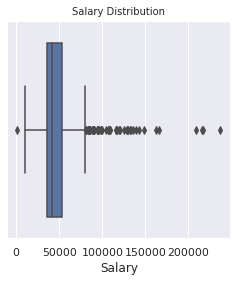

In [11]:
sns.set(rc={'figure.figsize':(4,4)})
a=sns.boxplot(data['Salary'])
a.set_title("Salary Distribution",fontsize=10)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


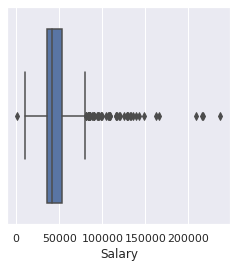

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


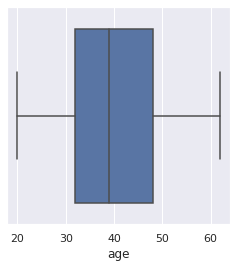

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


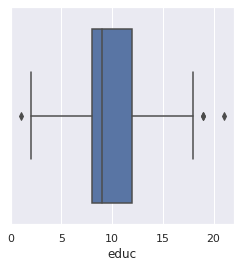

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


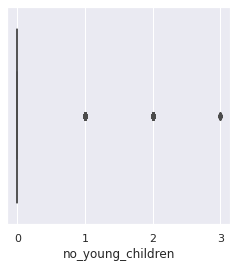

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


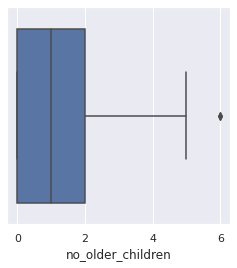

In [12]:
cols = ['Salary' ,'age', 'educ', 'no_young_children', 'no_older_children']
for i in cols:
    sns.boxplot(data[i])
    plt.show()

In [13]:
data.skew()

Unnamed: 0           0.000000
Salary               3.103216
age                  0.146412
educ                -0.045501
no_young_children    1.946515
no_older_children    0.953951
dtype: float64

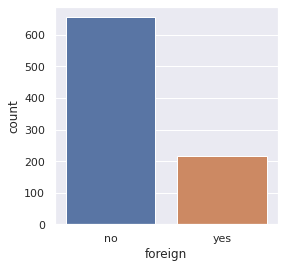

In [14]:
sns.countplot(x="foreign", data=data)

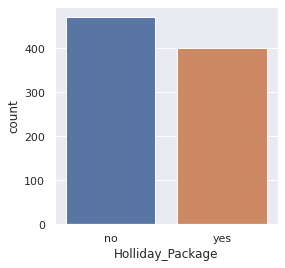

In [15]:
sns.countplot(x="Holliday_Package", data=data)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 32.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 37.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


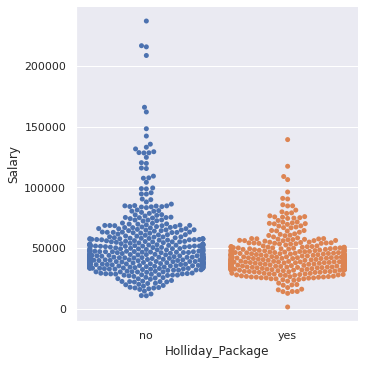

In [16]:
sns.catplot(x="Holliday_Package", y="Salary",kind="swarm",data=data)

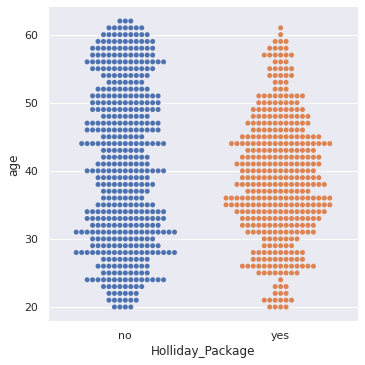

In [18]:
sns.catplot(x="Holliday_Package", y="age",kind="swarm",data=data)

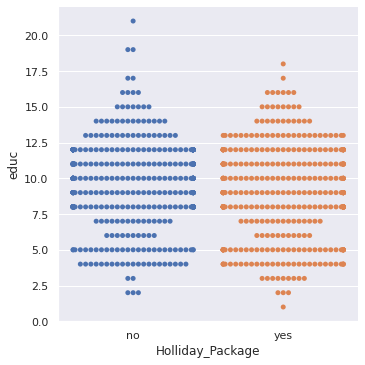

In [19]:
sns.catplot(x="Holliday_Package", y="educ",kind="swarm",data=data)

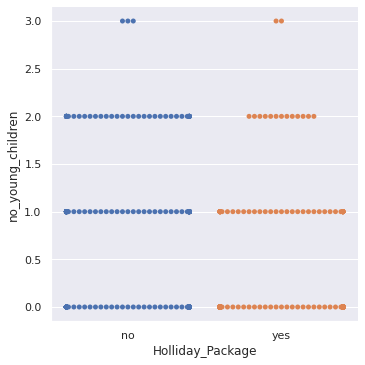

In [20]:
sns.catplot(x="Holliday_Package", y="no_young_children",kind="swarm",data=data)

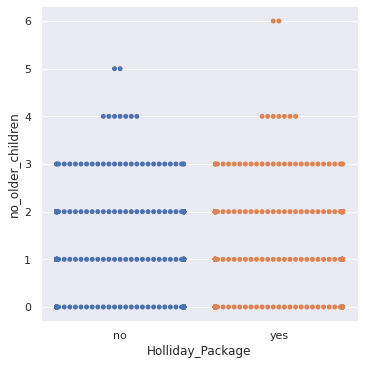

In [21]:
sns.catplot(x="Holliday_Package", y="no_older_children",kind="swarm",data=data)

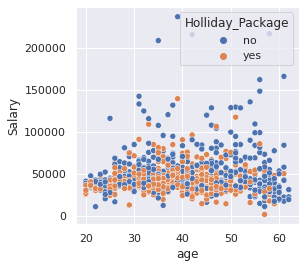

In [22]:
sns.scatterplot(data = data, x='age',y='Salary', hue = 'Holliday_Package')

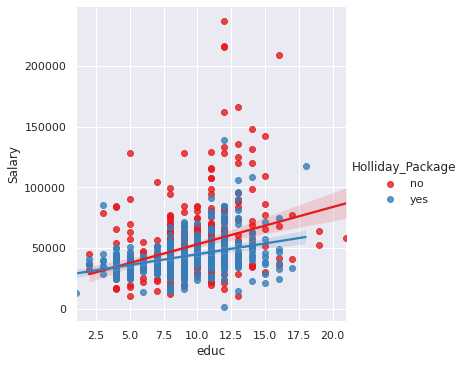

In [23]:
sns.lmplot(x="educ", y="Salary", hue="Holliday_Package", data=data,
               palette="Set1")

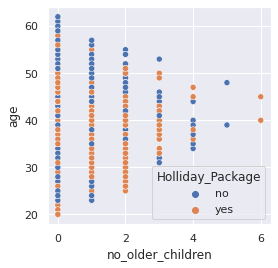

In [24]:
sns.scatterplot(data = data, x='no_older_children',y='age', hue = 'Holliday_Package')

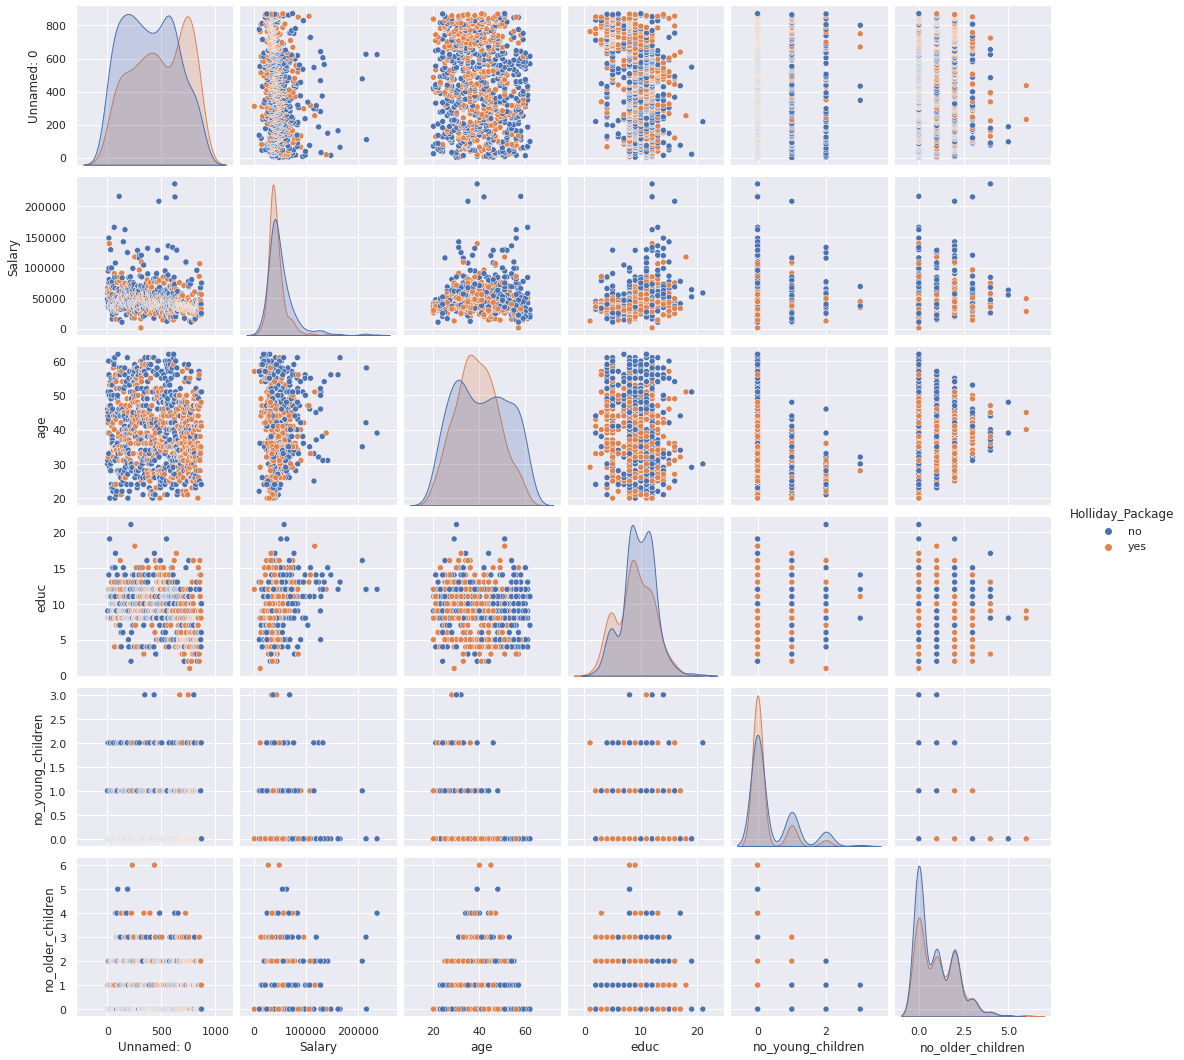

In [25]:
sns.pairplot(data ,diag_kind='kde' ,hue='Holliday_Package')

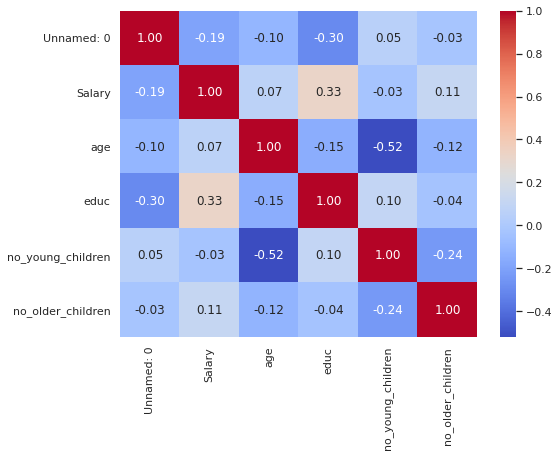

In [26]:
cor = data.corr()
plt.figure(figsize=(8,6))
sns.heatmap(cor, annot=True, fmt = '.2f', cmap='coolwarm')

In [27]:
out = data.dtypes[(data.dtypes!='uint8') & (data.dtypes!='object')].index

In [28]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [29]:
for column in data[out].columns:
    lr,ur=remove_outlier(data[column])
    data[column]=np.where(data[column]>ur,ur,data[column])
    data[column]=np.where(data[column]<lr,lr,data[column])

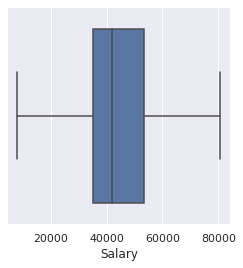

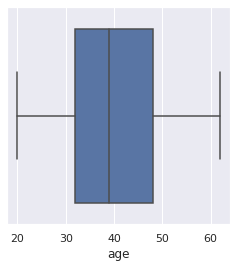

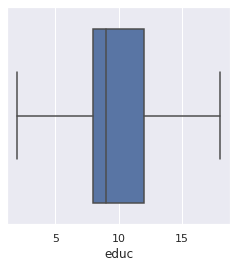

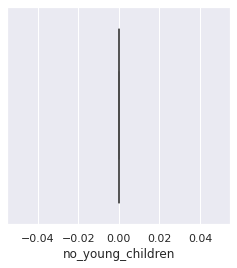

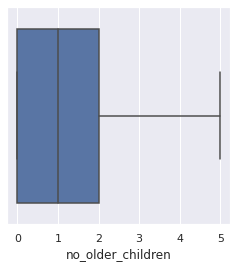

In [30]:
columns = ['Salary' ,'age', 'educ', 'no_young_children', 'no_older_children']
for i in columns:
    sns.boxplot(data[i])
    plt.show()

In [80]:
data1 = data.drop(columns=['Unnamed: 0'], axis=1)
data2 = data1.copy()
data1.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412.0,30.0,8.0,0.0,1.0,no
1,yes,37207.0,45.0,8.0,0.0,1.0,no
2,no,58022.0,46.0,9.0,0.0,0.0,no
3,no,66503.0,31.0,11.0,0.0,0.0,no
4,no,66734.0,44.0,12.0,0.0,2.0,no


In [86]:
df = pd.get_dummies(data2, columns=['Holliday_Package','foreign'], drop_first = True)
df.head()

,Salary,age,educ,no_young_children,no_older_children,Holliday_Package_yes,foreign_yes
0,48412.0,30.0,8.0,0.0,1.0,0,0
1,37207.0,45.0,8.0,0.0,1.0,1,0
2,58022.0,46.0,9.0,0.0,0.0,0,0
3,66503.0,31.0,11.0,0.0,0.0,0,0
4,66734.0,44.0,12.0,0.0,2.0,0,0


In [33]:
x = df.drop('Holliday_Package_yes', axis=1)
y = df['Holliday_Package_yes']

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30 , random_state=1,stratify=y)

In [36]:
grid={'penalty':['l1','l2','none'],
      'solver':['lbfgs', 'liblinear'],
      'tol':[0.0001,0.000001]}

In [37]:
model = LogisticRegression(max_iter=100000,n_jobs=2)

In [38]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [40]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100000, multi_class='auto',
                                          n_jobs=2, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'penalty': ['l1', 'l2', 'none'],
                         'solver': ['lbfgs', 'liblinear'],
                         'tol': [0.0001, 1e-06]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=0)

In [41]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l2', 'solver': 'liblinear', 'tol': 1e-06} 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100000,
                   multi_class='auto', n_jobs=2, penalty='l2',
                   random_state=None, solver='liblinear', tol=1e-06, verbose=0,
                   warm_start=False)


In [43]:
best_model = grid_search.best_estimator_
ytrain_predict = best_model.predict(x_train)
ytest_predict = best_model.predict(x_test)

In [44]:
ytest_predict_prob=best_model.predict_proba(x_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.636523,0.363477
1,0.576651,0.423349
2,0.650835,0.349165
3,0.568064,0.431936
4,0.536356,0.463644


              precision    recall  f1-score   support

           0       0.63      0.79      0.70       329
           1       0.65      0.45      0.53       281

    accuracy                           0.63       610
   macro avg       0.64      0.62      0.62       610
weighted avg       0.64      0.63      0.62       610
 



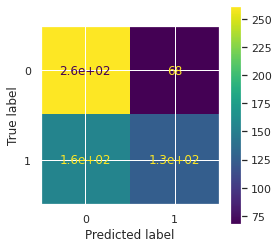

In [46]:
plot_confusion_matrix(best_model,x_train,y_train)
print(classification_report(y_train, ytrain_predict),'\n');

              precision    recall  f1-score   support

           0       0.64      0.83      0.72       142
           1       0.69      0.45      0.55       120

    accuracy                           0.66       262
   macro avg       0.67      0.64      0.63       262
weighted avg       0.66      0.66      0.64       262
 



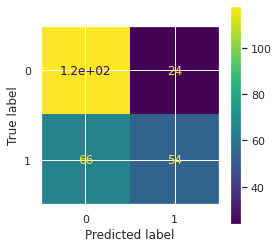

In [47]:
plot_confusion_matrix(best_model,x_test,y_test)
print(classification_report(y_test, ytest_predict),'\n');

In [49]:
lr_train_acc = best_model.score(x_train, y_train)
lr_train_acc

0.6344262295081967

AUC: 0.661


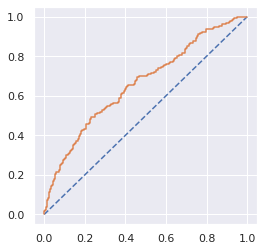

In [51]:
probs = best_model.predict_proba(x_train)
probs = probs[:, 1]
lr_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % lr_train_auc)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr);

In [53]:
lr_test_acc = best_model.score(x_test, y_test)
lr_test_acc

0.6564885496183206

AUC: 0.675


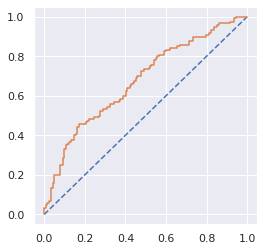

In [54]:
probs = best_model.predict_proba(x_test)
probs = probs[:, 1]
lr_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lr_test_auc)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr, test_tpr);

In [56]:
lr_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
df=pd.DataFrame(lr_metrics).transpose()
lr_train_f1=round(df.loc["1"][2],2)
lr_train_recall=round(df.loc["1"][1],2)
lr_train_precision=round(df.loc["1"][0],2)
print ('lr_train_precision ',lr_train_precision)
print ('lr_train_recall ',lr_train_recall)
print ('lr_train_f1 ',lr_train_f1)

lr_train_precision  0.65
lr_train_recall  0.45
lr_train_f1  0.53


In [57]:
lr_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(lr_metrics).transpose()
lr_test_f1=round(df.loc["1"][2],2)
lr_test_recall=round(df.loc["1"][1],2)
lr_test_precision=round(df.loc["1"][0],2)
print ('lr_test_precision ',lr_test_precision)
print ('lr_test_recall ',lr_test_recall)
print ('lr_test_f1 ',lr_test_f1)

lr_test_precision  0.69
lr_test_recall  0.45
lr_test_f1  0.55


In [81]:
data1.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412.0,30.0,8.0,0.0,1.0,no
1,yes,37207.0,45.0,8.0,0.0,1.0,no
2,no,58022.0,46.0,9.0,0.0,0.0,no
3,no,66503.0,31.0,11.0,0.0,0.0,no
4,no,66734.0,44.0,12.0,0.0,2.0,no


In [82]:
X = data1.drop('Holliday_Package',axis=1)
Y = data1.pop('Holliday_Package')

In [88]:
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(X,Y,test_size=0.30,random_state=1,stratify = Y)

In [87]:
X = df.drop('Holliday_Package_yes', axis=1)
Y = df['Holliday_Package_yes']

In [89]:
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,Y_train)

In [90]:
pred_class_train = model.predict(X_train)
pred_class_test = model.predict(X_test)

In [91]:
pred_prob_train = model.predict_proba(X_train)
pred_prob_test = model.predict_proba(X_test)

In [92]:
lda_train_acc = model.score(X_train,Y_train)
lda_train_acc

0.6327868852459017

In [93]:
print(classification_report(Y_train, pred_class_train))

              precision    recall  f1-score   support

           0       0.62      0.80      0.70       329
           1       0.65      0.44      0.52       281

    accuracy                           0.63       610
   macro avg       0.64      0.62      0.61       610
weighted avg       0.64      0.63      0.62       610



In [94]:
lda_test_acc = model.score(X_test,Y_test)
lda_test_acc

0.6564885496183206

In [95]:
print(classification_report(Y_test, pred_class_test))

              precision    recall  f1-score   support

           0       0.64      0.83      0.72       142
           1       0.69      0.45      0.55       120

    accuracy                           0.66       262
   macro avg       0.67      0.64      0.63       262
weighted avg       0.66      0.66      0.64       262



AUC for the Training Data: 0.661
AUC for the Test Data: 0.675


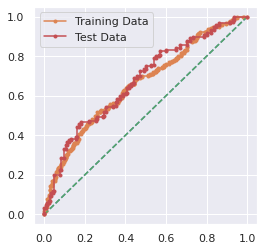

In [96]:
lda_train_auc = metrics.roc_auc_score(Y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % lda_train_auc)
fpr, tpr, thresholds = metrics.roc_curve(Y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.',label = 'Training Data')
lda_test_auc = metrics.roc_auc_score(Y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % lda_test_auc)
fpr, tpr, thresholds = metrics.roc_curve(Y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.',label='Test Data')
plt.legend(loc='best')
plt.show()

In [97]:
lda_metrics=classification_report(Y_train, pred_class_train,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_train_f1=round(df.loc["1"][2],2)
lda_train_recall=round(df.loc["1"][1],2)
lda_train_precision=round(df.loc["1"][0],2)
print ('lda_train_precision ',lda_train_precision)
print ('lda_train_recall ',lda_train_recall)
print ('lda_train_f1 ',lr_train_f1)

lda_train_precision  0.65
lda_train_recall  0.44
lda_train_f1  0.53


In [98]:
lda_metrics=classification_report(Y_test, pred_class_test,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_test_f1=round(df.loc["1"][2],2)
lda_test_recall=round(df.loc["1"][1],2)
lda_test_precision=round(df.loc["1"][0],2)
print ('lda_test_precision ',lda_test_precision)
print ('lda_test_recall ',lda_test_recall)
print ('lda_test_f1 ',lda_test_f1)

lda_test_precision  0.69
lda_test_recall  0.45
lda_test_f1  0.55
